Nama : Fajrul Hasnan Sani

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-16 16:46:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.50MB/s    in 81s     

2021-07-16 16:47:33 (3.80 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Mengekstrak pada file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
#Nama pada file
os.listdir('/content/	mp/rockpaperscissors/rps-cv-images')

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

In [ ]:
#Jumlah gambar rock
len(os.listdir('/content/	mp/rockpaperscissors/rps-cv-images/rock'))

726

In [ ]:
#Jumlah gambar paper
len(os.listdir('/content/	mp/rockpaperscissors/rps-cv-images/paper'))

712

In [ ]:
#Jumlah gambar scissors
len(os.listdir('/content/	mp/rockpaperscissors/rps-cv-images/scissors'))

750

In [ ]:
#Augmentasi gambar
basic_dir = ('/content/	mp/rockpaperscissors/rps-cv-images')

train_dataset = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.2)
    

In [ ]:
train_generator = train_dataset.flow_from_directory(
        basic_dir, #Direktori data latih
        target_size=(100, 140),  #Mengubah resolusi gambar menjadi 100*140 pixel
        #class_mode='sparse',
        shuffle=True,
        subset='training')
 
validation_generator = train_dataset.flow_from_directory(
        basic_dir, #Direktori data validation
        target_size=(100, 140), #Mengubah resolusi gambar menjadi 100*140 pixel
        #class_mode='sparse',
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 140, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#Compile model 'Adam' optimizer loss function
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#Latih model dalam model.fit 
model.fit(
      train_generator, 
      steps_per_epoch=32, #Berapa batch yang akan dieksekusi untuk setiap epoch
      epochs=10,
      validation_data=validation_generator, #Menampilkan pengujian data akurasi vadasi
      validation_steps=8, #Berapa batch yang akan di eksekusi untuk setiap epoch-nya
      verbose=2)

Epoch 1/10
32/32 - 26s - loss: 0.9800 - accuracy: 0.5695 - val_loss: 0.8195 - val_accuracy: 0.6211
Epoch 2/10
32/32 - 25s - loss: 0.4653 - accuracy: 0.8424 - val_loss: 0.5025 - val_accuracy: 0.8164
Epoch 3/10
32/32 - 25s - loss: 0.2682 - accuracy: 0.9103 - val_loss: 0.2248 - val_accuracy: 0.9102
Epoch 4/10
32/32 - 27s - loss: 0.1882 - accuracy: 0.9443 - val_loss: 0.1924 - val_accuracy: 0.9336
Epoch 5/10
32/32 - 25s - loss: 0.1629 - accuracy: 0.9453 - val_loss: 0.2011 - val_accuracy: 0.9219
Epoch 6/10
32/32 - 25s - loss: 0.1361 - accuracy: 0.9557 - val_loss: 0.2085 - val_accuracy: 0.9297
Epoch 7/10
32/32 - 25s - loss: 0.1489 - accuracy: 0.9537 - val_loss: 0.1263 - val_accuracy: 0.9648
Epoch 8/10
32/32 - 25s - loss: 0.1133 - accuracy: 0.9626 - val_loss: 0.1728 - val_accuracy: 0.9414
Epoch 9/10
32/32 - 25s - loss: 0.1097 - accuracy: 0.9619 - val_loss: 0.1460 - val_accuracy: 0.9453
Epoch 10/10
32/32 - 25s - loss: 0.0812 - accuracy: 0.9648 - val_loss: 0.1188 - val_accuracy: 0.9570


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 0Ug54ifXRqqlZS2Z.png to 0Ug54ifXRqqlZS2Z.png
0Ug54ifXRqqlZS2Z.png
scissors


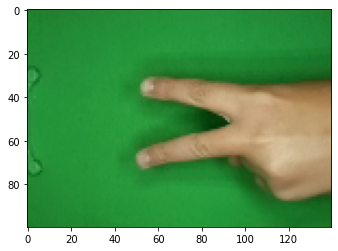

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,140))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')